In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('all.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
data = happines_data[['GDP per capita','Healthy life expectancy']]

In [98]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='diag', random_state=669)
gmm.fit_predict(data)

from sklearn.metrics import silhouette_score
score = silhouette_score(data, gmm.fit_predict(data))
print("Score: ", score)

Score:  0.4227573428572033


In [76]:
gmm.get_params()

{'covariance_type': 'diag',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

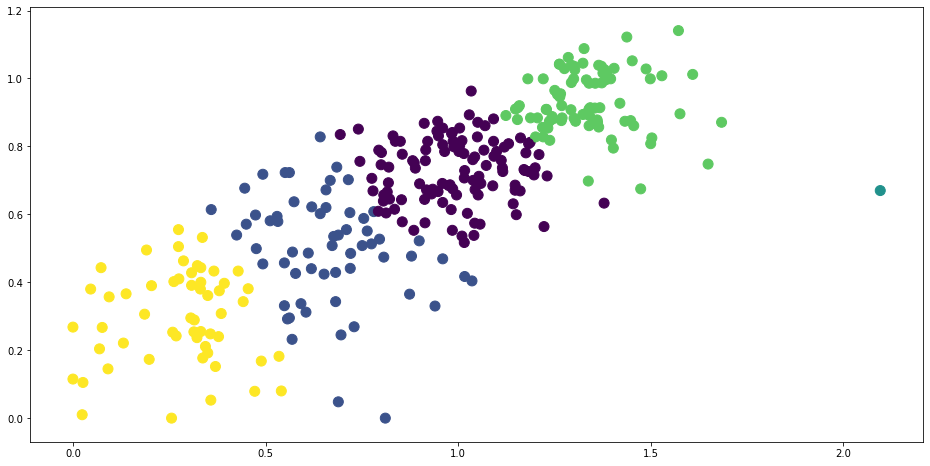

In [99]:
plt.figure(figsize=(16, 8))
plt.scatter(data['GDP per capita'], data['Healthy life expectancy'], c = gmm.fit_predict(data), s=100)

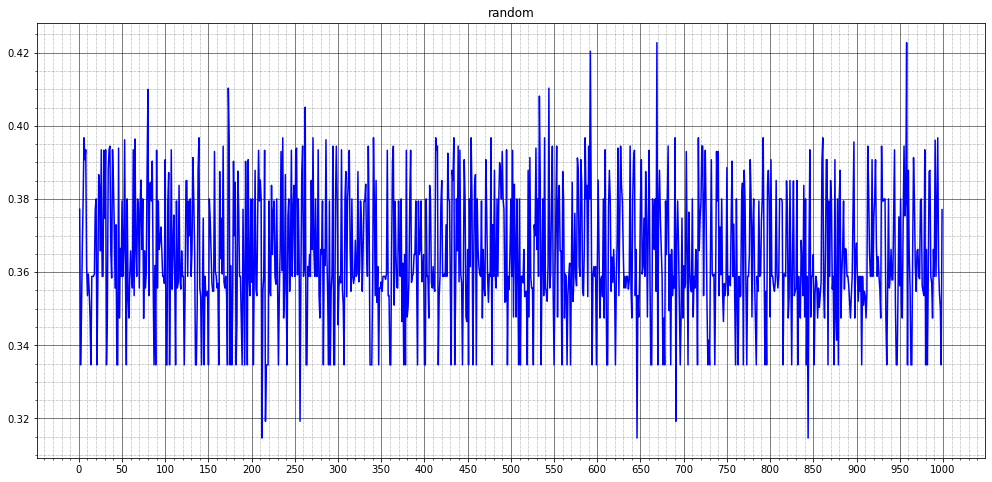

In [96]:
random = np.arange(1, 1000, 1)
results = []

for feature in random:
    rf = GaussianMixture(n_components=5, covariance_type='diag', random_state=feature)
    rf.fit_predict(data)
        
    results.append(silhouette_score(data, rf.fit_predict(data)))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(random, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('random')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))

In [97]:
print(results[results.index(max(results))])
print(random[results.index(max(results))])

0.4227573428572033
669
